In [2]:
import numpy as np
import os
from genesis.generator import build_generator, st_sampled_softmax, st_hardmax_softmax
from genesis.visualization import plot_seqprop_logo
from keras.models import load_model
from keras.utils import plot_model
import pandas as pd


Using TensorFlow backend.


Test loading in pretrained DEN models at different isoform levels

Target iso = 1.0














2024-03-10 18:56:11.983522: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2024-03-10 18:56:11.992422: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400000000 Hz
2024-03-10 18:56:11.994471: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563cf8ff5240 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-03-10 18:56:11.994499: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


Instructions for updating:
Use `tf.random.categorical` instead.




/gpfs/commons/home/tchen/al_project/genesis/original_den_env/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


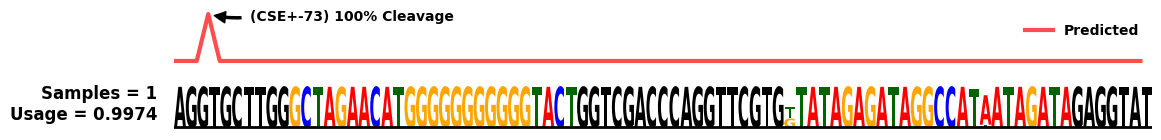

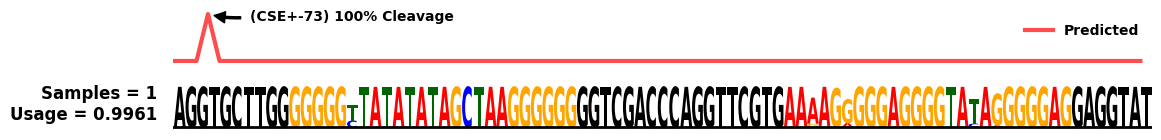

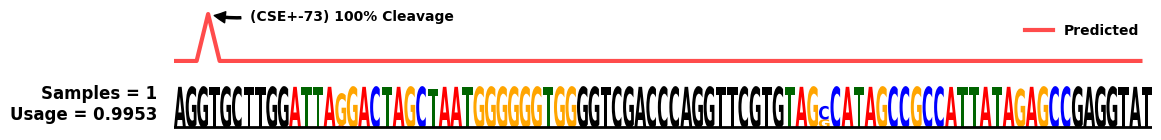

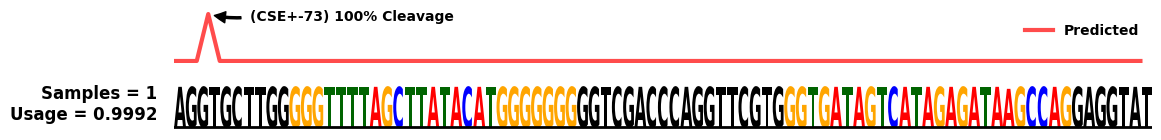

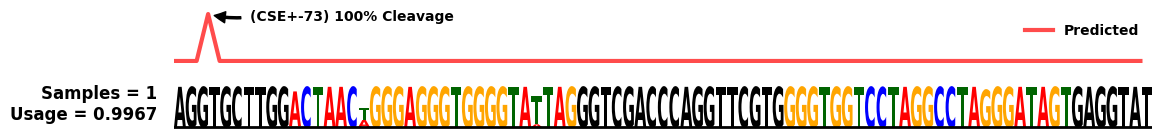

Target iso = 0.75


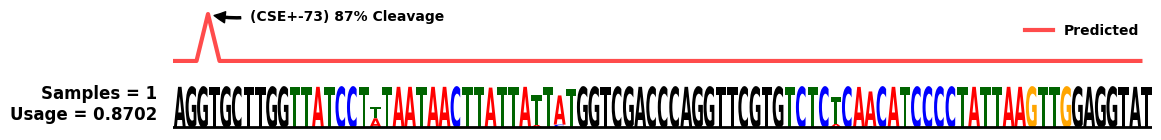

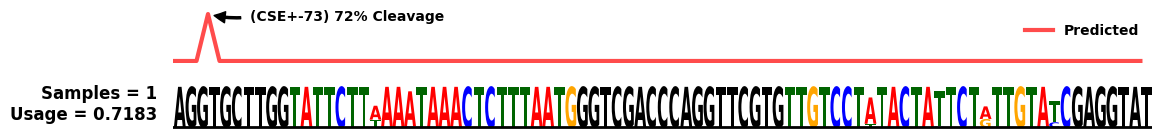

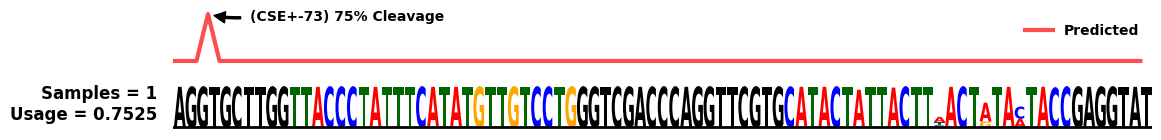

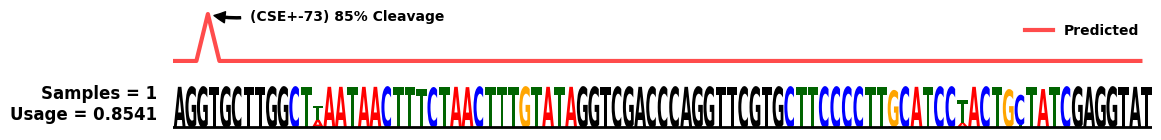

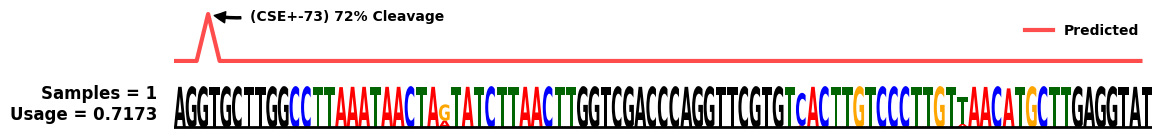

Target iso = 0.5


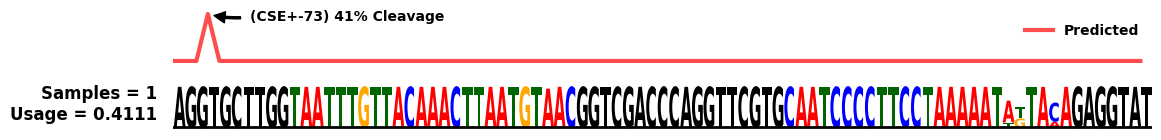

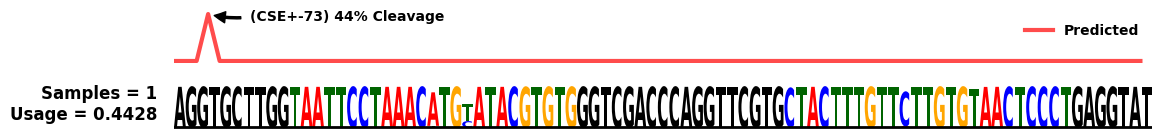

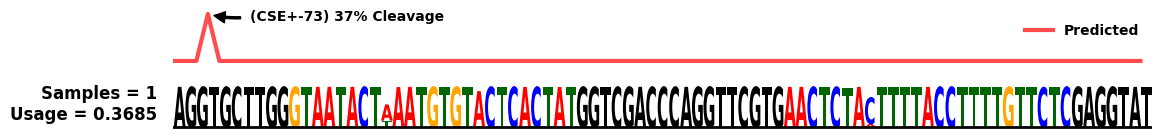

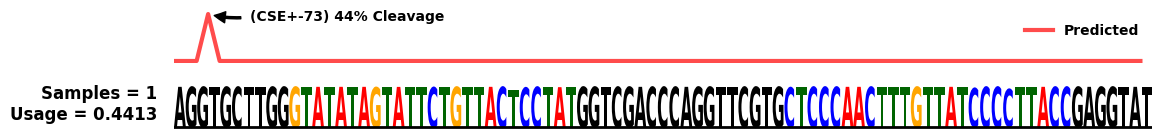

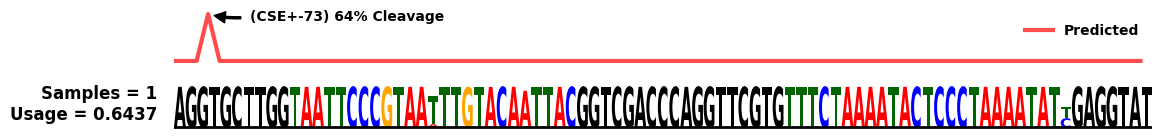

Target iso = 0.25


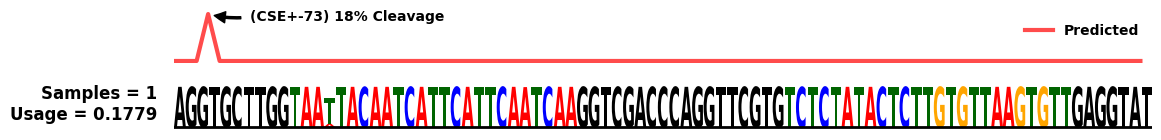

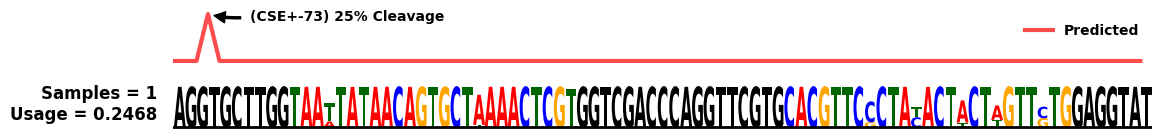

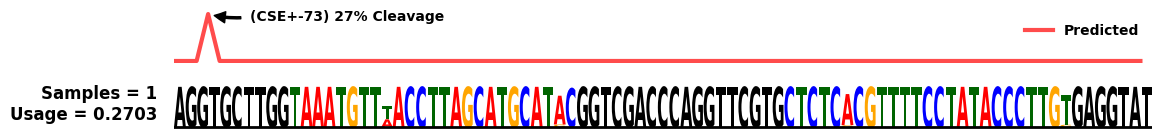

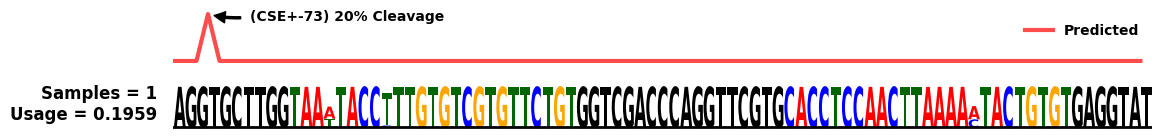

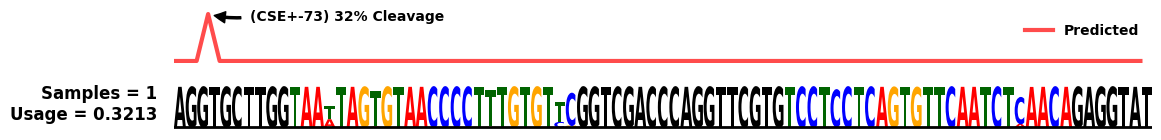

Target iso = 0.0


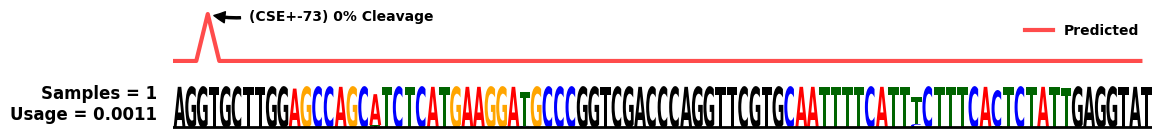

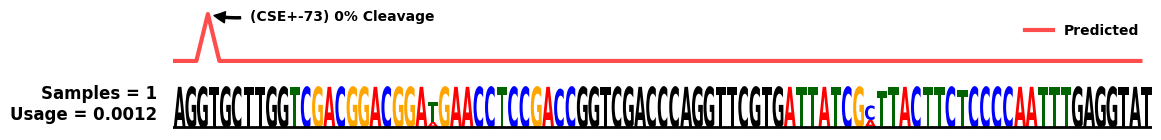

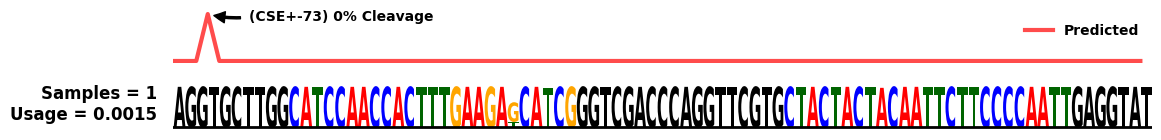

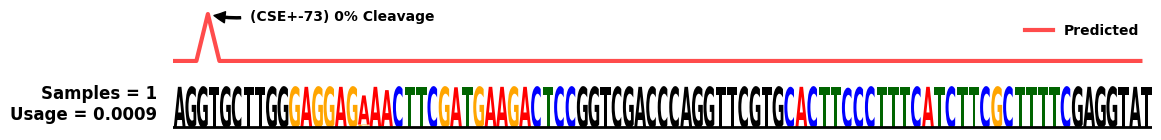

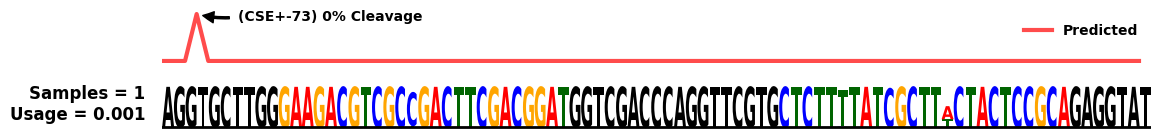

In [3]:
#Load GENESIS models and predict sample sequences

model_names = [
    'genesis_splicing_cnn_target_isoform_00_pwm_and_multisample_hek_only_random_regions_50_epochs_harderentropy',
    'genesis_splicing_cnn_target_isoform_025_pwm_and_multisample_hek_only_random_regions_50_epochs_harderentropy',
    'genesis_splicing_cnn_target_isoform_05_pwm_and_multisample_hek_only_random_regions_50_epochs_harderentropy',
    'genesis_splicing_cnn_target_isoform_075_pwm_and_multisample_hek_only_random_regions_50_epochs_harderentropy',
    'genesis_splicing_cnn_target_isoform_10_pwm_and_multisample_hek_only_random_regions_70_epochs_harderentropy',
]

sequence_templates = [
    'AGGTGCTTGGNNNNNNNNNNNNNNNNNNNNNNNNNGGTCGACCCAGGTTCGTGNNNNNNNNNNNNNNNNNNNNNNNNNGAGGTATTCTTATCACCTTCGTGGCTACAGA',
    'AGGTGCTTGGNNNNNNNNNNNNNNNNNNNNNNNNNGGTCGACCCAGGTTCGTGNNNNNNNNNNNNNNNNNNNNNNNNNGAGGTATTCTTATCACCTTCGTGGCTACAGA',
    'AGGTGCTTGGNNNNNNNNNNNNNNNNNNNNNNNNNGGTCGACCCAGGTTCGTGNNNNNNNNNNNNNNNNNNNNNNNNNGAGGTATTCTTATCACCTTCGTGGCTACAGA',
    'AGGTGCTTGGNNNNNNNNNNNNNNNNNNNNNNNNNGGTCGACCCAGGTTCGTGNNNNNNNNNNNNNNNNNNNNNNNNNGAGGTATTCTTATCACCTTCGTGGCTACAGA',
    'AGGTGCTTGGNNNNNNNNNNNNNNNNNNNNNNNNNGGTCGACCCAGGTTCGTGNNNNNNNNNNNNNNNNNNNNNNNNNGAGGTATTCTTATCACCTTCGTGGCTACAGA'
]

library_contexts = [
    'n/a',
    'n/a',
    'n/a',
    'n/a',
    'n/a'
]

target_isos = [
    0.00,
    0.25,
    0.5,
    0.75,
    1.0
]


save_name_suffixes = [
    'hek',
    'hek',
    'hek',
    'hek',
    'hek'
]

for class_i in range(len(sequence_templates)-1, 0-1, -1) :
    print("Target iso = " + str(target_isos[class_i]))
    
    save_dir = os.path.join('/gpfs/commons/groups/knowles_lab/ting/DEN_splicing_pretrained_models/')
    model_name = model_names[class_i] + '_predictor.h5'
    model_path = os.path.join(save_dir, model_name)

    predictor = load_model(model_path, custom_objects={'st_sampled_softmax': st_sampled_softmax, 'st_hardmax_softmax': st_hardmax_softmax})
    
    n = 32

    sequence_class = np.array([0] * n).reshape(-1, 1) #np.random.uniform(-6, 6, (n, 1)) #

    noise_1 = np.random.uniform(-1, 1, (n, 100))
    noise_2 = np.random.uniform(-1, 1, (n, 100))

    pred_outputs = predictor.predict([sequence_class, noise_1, noise_2], batch_size=32)

    _, _, _, optimized_pwm, _, _, _, _, _, hek_pred, _, _, _ = pred_outputs
    
    for pwm_index in range(5) :

        sequence_template = sequence_templates[class_i]

        pwm = np.expand_dims(optimized_pwm[pwm_index, :, :, 0], axis=0)
        iso = np.expand_dims(hek_pred[pwm_index, 0], axis=0)
        cut = np.zeros((1, 109))
        cut[0, 3] = iso[0]

        plot_seqprop_logo(pwm, iso, cut, annotate_peaks='max', sequence_template=sequence_template, figsize=(12, 1.5), width_ratios=[1, 8], logo_height=0.8, usage_unit='fraction', plot_start=0, plot_end=85, save_figs=False, fig_name='splicing_target_isoform_genesis_' + str(target_isos[class_i]).replace(".", "") + "_pwm_index_" + str(pwm_index), fig_dpi=150)




In [4]:
predictor.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sequence_class_seed (InputLayer (32, 1)              0                                            
__________________________________________________________________________________________________
lambda_rand_sequence_class (Lam (32, 1)              0           sequence_class_seed[0][0]        
__________________________________________________________________________________________________
noise_input_1 (InputLayer)      (32, 100)            0                                            
__________________________________________________________________________________________________
lambda_rand_input_1 (Lambda)    (32, 100)            0           noise_input_1[0][0]              
__________________________________________________________________________________________________
lambda_1 (

In [4]:
sequence_class = np.array([0] * n).reshape(-1, 1) #np.random.uniform(-6, 6, (n, 1)) #

noise_1 = np.random.uniform(-1, 1, (n, 100))
noise_2 = np.random.uniform(-1, 1, (n, 100))

pred_outputs = predictor.predict([sequence_class, noise_1, noise_2], batch_size=32)

In [20]:
predictor.inputs

[<tf.Tensor 'sequence_class_seed_4:0' shape=(32, 1) dtype=int32>,
 <tf.Tensor 'noise_input_1_4:0' shape=(32, 100) dtype=float32>,
 <tf.Tensor 'noise_input_2_4:0' shape=(32, 100) dtype=float32>]

In [21]:
predictor.outputs

[<tf.Tensor 'lambda_rand_sequence_class_4/Identity:0' shape=(32, 1) dtype=int32>,
 <tf.Tensor 'masking_layer_8/add:0' shape=(32, 109, 4, 1) dtype=float32>,
 <tf.Tensor 'masking_layer_9/add:0' shape=(32, 109, 4, 1) dtype=float32>,
 <tf.Tensor 'pwm_1_4/truediv:0' shape=(32, 109, 4, 1) dtype=float32>,
 <tf.Tensor 'pwm_2_4/truediv:0' shape=(32, 109, 4, 1) dtype=float32>,
 <tf.Tensor 'lambda_10_4/transpose:0' shape=(32, 10, 109, 4, 1) dtype=float32>,
 <tf.Tensor 'lambda_11_4/transpose:0' shape=(32, 10, 109, 4, 1) dtype=float32>,
 <tf.Tensor 'reshape_4_9/Reshape:0' shape=(32, 109, 4, 1) dtype=float32>,
 <tf.Tensor 'lambda_12_4/transpose:0' shape=(32, 10, 109, 4, 1) dtype=float32>,
 <tf.Tensor 'lambda_22_4/Reshape:0' shape=(32, 10, 1) dtype=float32>,
 <tf.Tensor 'lambda_23_4/Reshape:0' shape=(32, 10, 1) dtype=float32>,
 <tf.Tensor 'lambda_24_4/Reshape:0' shape=(32, 10, 1) dtype=float32>,
 <tf.Tensor 'lambda_25_4/Reshape:0' shape=(32, 10, 1) dtype=float32>]

In [5]:
_, _, _, optimized_pwm, _, _, _, _, _, hek_pred, _, _, _ = pred_outputs

In [6]:
np.around(optimized_pwm.reshape((32, 109, 4))[0], decimals=3)

array([[1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.499, 0.   , 0.   , 0.501],
       [0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
 

In [7]:
# compare optimized_pwm with pwm from pytorch model
# load optimized pwm
save_path = '/gpfs/commons/groups/knowles_lab/ting/'
save_name = 'pytorch_optimized_pwm_target_isoform_00.npy'

pytorch_optimized_pwm = np.load(save_path+save_name, allow_pickle=True)

In [9]:
comparison = np.around(pytorch_optimized_pwm.reshape((32, 109, 4))[0], decimals=3) == np.around(optimized_pwm.reshape((32, 109, 4))[0], decimals=3)

In [20]:
s_1 = set(np.where(comparison == False)[0].tolist())
s_2 = set([i for i, ltr in enumerate(sequence_template) if ltr == 'N'])

In [21]:
# this means templating went through correctly..
s_1 - s_2

set()

In [3]:
np.mean(hek_pred)

0.002313789

In [4]:
plot_model(
    predictor
)


ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [19]:
pd.DataFrame(hek_pred.reshape(-1)).describe()

,0
count,320.000000
mean,0.001944
std,0.000847
min,0.000525
25%,0.001342
50%,0.001789
75%,0.002457
max,0.004033


In [5]:
from keras import backend as K
import tensorflow as tf
from keras.layers import Reshape, Embedding
import isolearn.keras as iso

In [10]:
sequence_class_input = K.ones((32, 1))
sequence_class = K.cast(K.round(sequence_class_input * K.random_uniform((32, 1), minval=-0.4999, maxval=1-0.5001)), dtype='int32')

In [6]:
n_classes = 1
seq_length = 109

In [7]:
def initialize_sequence_templates(generator, sequence_templates) :
    embedding_templates = []
    embedding_masks = []

    for k in range(len(sequence_templates)) :
        sequence_template = sequence_templates[k]
        onehot_template = iso.OneHotEncoder(seq_length=len(sequence_template))(sequence_template).reshape((len(sequence_template), 4, 1))
        
        for j in range(len(sequence_template)) :
            if sequence_template[j] not in ['N', 'X'] :
                nt_ix = np.argmax(onehot_template[j, :, 0])
                onehot_template[j, :, :] = -4.0
                onehot_template[j, nt_ix, :] = 10.0
            elif sequence_template[j] == 'X' :
                onehot_template[j, :, :] = -1.0

        onehot_mask = np.zeros((len(sequence_template), 4, 1))
        for j in range(len(sequence_template)) :
            if sequence_template[j] == 'N' :
                onehot_mask[j, :, :] = 1.0
        
        embedding_templates.append(onehot_template.reshape(1, -1))
        embedding_masks.append(onehot_mask.reshape(1, -1))

    embedding_templates = np.concatenate(embedding_templates, axis=0)
    embedding_masks = np.concatenate(embedding_masks, axis=0)

    return embedding_templates, embedding_masks

In [8]:
embedding_templates, embedding_masks = initialize_sequence_templates(None, ['AGGTGCTTGGNNNNNNNNNNNNNNNNNNNNNNNNNGGTCGACCCAGGTTCGTGNNNNNNNNNNNNNNNNNNNNNNNNNGAGGTATTCTTATCACCTTCGTGGCTACAGA'])

In [11]:
pretrained_model_weights = predictor.get_weights()

In [18]:
for i, weight in enumerate(pretrained_model_weights):
    print(i, weight.shape)

0 (101, 3456)
1 (3456,)
2 (7, 1, 256, 384)
3 (256,)
4 (256,)
5 (256,)
6 (256,)
7 (256,)
8 (8, 1, 192, 256)
9 (192,)
10 (192,)
11 (192,)
12 (192,)
13 (192,)
14 (7, 1, 128, 192)
15 (128,)
16 (128,)
17 (128,)
18 (128,)
19 (128,)
20 (8, 1, 128, 128)
21 (128,)
22 (128,)
23 (128,)
24 (128,)
25 (128,)
26 (8, 1, 128, 64)
27 (64,)
28 (64,)
29 (64,)
30 (64,)
31 (64,)
32 (8, 1, 64, 4)
33 (4,)
34 (1, 436)
35 (1, 436)
36 (8, 4, 96)
37 (96,)
38 (6, 96, 128)
39 (128,)
40 (4352, 256)
41 (256,)
42 (256, 1)
43 (1,)
44 (256, 1)
45 (1,)
46 (256, 1)
47 (1,)
48 (256, 1)
49 (1,)


In [21]:
# we know that the embedding masks and templates are equal

np.testing.assert_allclose(pretrained_model_weights[34], embedding_templates)
np.testing.assert_allclose(pretrained_model_weights[35], embedding_masks)

In [42]:
reshape_layer = Reshape((seq_length, 4, 1))
	
onehot_template_dense = Embedding(n_classes, seq_length * 4, weights=[embedding_templates], name='template_dense')
onehot_mask_dense = Embedding(n_classes, seq_length * 4, weights=[embedding_masks], name='mask_dense')

# onehot_template_dense.set_weights([embedding_templates])
# onehot_mask_dense.set_weights([embedding_masks])

onehot_template = reshape_layer(onehot_template_dense(sequence_class))
onehot_mask = reshape_layer(onehot_mask_dense(sequence_class))

Check predictor and generator weights against each other

In [23]:
model_name = 'genesis_splicing_cnn_target_isoform_00_pwm_and_multisample_hek_only_random_regions_50_epochs_harderentropy_generator.h5'
model_save_dir = '/gpfs/commons/groups/knowles_lab/ting/DEN_splicing_pretrained_models/'

full_path = model_save_dir + model_name
generator_model = load_model(filepath=str(full_path), custom_objects={'K': K, 'st_sampled_softmax': st_sampled_softmax, 'st_hardmax_softmax': st_hardmax_softmax}, compile=False)

In [25]:
# looks like these are identical too, correctly
for i, (layer_g, layer_p) in enumerate(zip(generator_model.get_weights(), predictor.get_weights())):
    print(i)
    np.testing.assert_allclose(layer_g, layer_p)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [26]:
len(generator_model.get_weights())

36